## Regression Models

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Linear Regression

There are 2 very different ways to train it:

- Using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set   (i.e., the model parameters that minimize the cost function over the training set)
- Using an iterative optimization approach called *Gradien Descent* that gradually tweaks the model parameters to minimize the   cost function over the training set

More generally, a linear model makes predictions by simply computing a weighted sum of the input features, plus a constant called the *bias term* (*intersept term*).


**The Normal Equation**

Generate some linear looking data to test this equation

In [8]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

Transform `x` and use the normal equation to find the best parameters

In [13]:
x_b = np.c_[np.ones((100, 1)), x]  # add x0 = 1 to each instance for the bias term

theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.80650669],
       [3.18502625]])

Now we can make predictions using `theta_best`

In [14]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]  # add x0 = 1 to each instance for the bias term

y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.80650669],
       [10.1765592 ]])

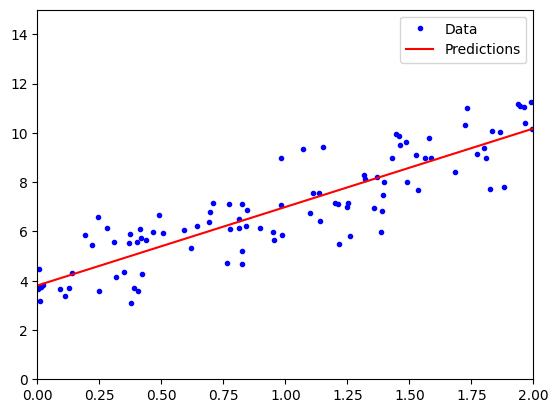

In [16]:
plt.plot(x, y, 'b.', label='Data')
plt.plot(x_new, y_predict, 'r-', label='Predictions')
plt.axis([0, 2, 0, 15]); plt.legend()
plt.show()

Performing Linear Regression using `Scikit-learn` is simple

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)  # no need to transform x

lin_reg.intercept_, lin_reg.coef_

(array([3.80650669]), array([[3.18502625]]))

In [18]:
lin_reg.predict(x_new)

array([[ 3.80650669],
       [10.1765592 ]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function

In [19]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[3.80650669],
       [3.18502625]])

This function computes the *pseudoinverse* of X. You can compute it directly by

In [20]:
np.linalg.pinv(x_b).dot(y)

array([[3.80650669],
       [3.18502625]])

This approach based on *SVD decomposition* is more efficient than computing the Normal Equation, plus it handles edge cases nicely.